In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

In [2]:
test_file = "22430_20220322115422.jpg"

In [3]:
# Function to show an image using pyplot
def show_img(img, size=12):
  fig = plt.gcf()
  fig.set_size_inches(size, size)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [16]:
def mask_red(img):

    # img=cv2.imread('./sipaimages/2/22319_20220321100409.jpg')
    img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([40,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # join my masks
    mask = mask0+mask1

    # set my output img to zero everywhere except my mask
    output_img = img.copy()
    output_img[np.where(mask==0)] = 0

    # or your HSV image, which I *believe* is what you want
    output_hsv = img_hsv.copy()
    output_hsv[np.where(mask==0)] = 0

    return output_img


In [4]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)


def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base


(<AxesSubplot:title={'center':'Gaussian Low Pass'}>,
 Text(0.5, 1.0, 'Gaussian Low Pass'))

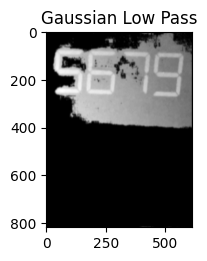

In [21]:
img = cv2.imread(test_file)

img2 = mask_red(img)
nimGray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
original = np.fft.fft2(nimGray)
center = np.fft.fftshift(original)


LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")


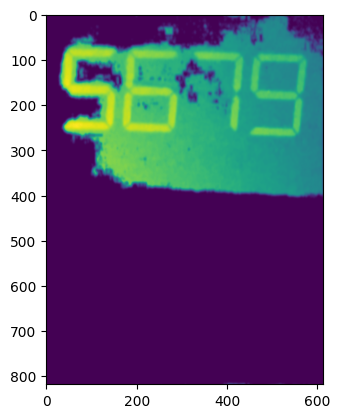

In [24]:
# show_img(np.abs(inverse_LowPass))

plt.imshow(np.abs(inverse_LowPass));

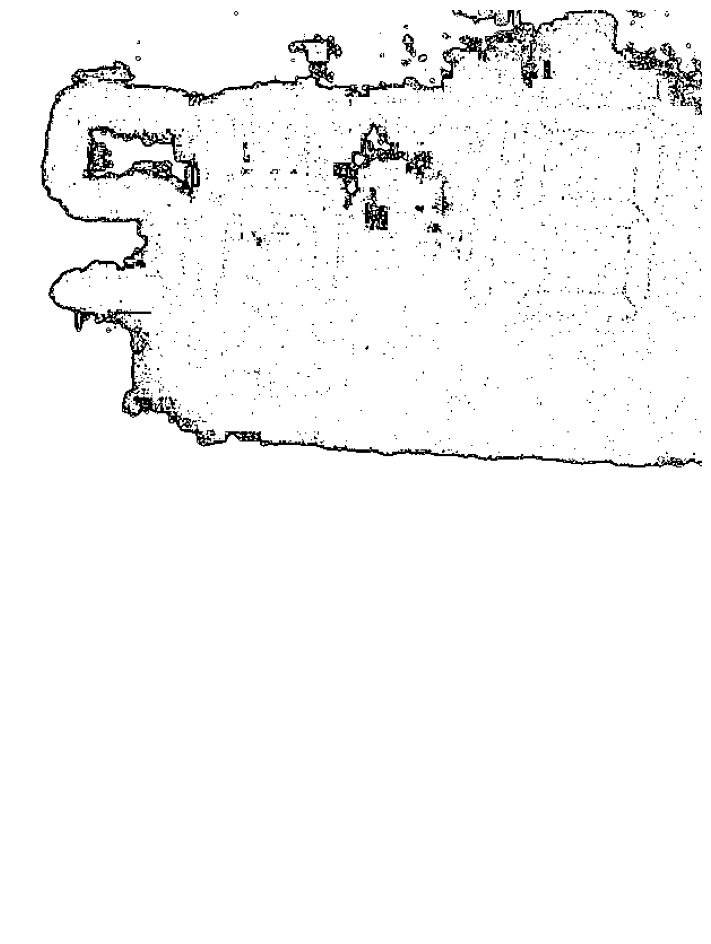

In [26]:
img = cv2.imread(test_file)
img2 = mask_red(img)

nimGray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
adaptive_gaussian = cv2.adaptiveThreshold(nimGray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)


# show_img(nimGray)
show_img(adaptive_gaussian)